In [5]:
import pandas as pd
import os, time,json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Extract more data: 2018 and 2020 Movies

In [2]:
with open('/Users/qfu88/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()

dict_keys(['api-key'])

In [3]:
!pip install tqdm
from tqdm.notebook import tqdm_notebook

In [4]:
!pip install tmdbsimple
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [5]:
#define a function to add the certification with the other key information.
def get_movie_certification(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
    return info

In [6]:
#define the write_json function
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [8]:
# designate a folder
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_rating.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_results_combined.csv.gz']

In [9]:
#load in the title basics data
basics = pd.read_csv('Data/title_basics.csv.gz')

In [10]:
# create required lists for the loop
## define a list of the year to extract from the API
YEARS_TO_GET = [2018,2020]

In [11]:
#define an errors list 
errors = [ ]

## Loops

In [12]:
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)
    if file_exists == False:
         with open(JSON_FILE,'w') as f:
                json.dump([{'imdb_id':0}],f)
      #define the IDs to call
    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()
    # saving movie ids to list
    movie_ids = df['tconst'].copy()
        #Check for and remove any previously downloaded Movie id's
## Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
# filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]
    for movie_id in tqdm_notebook(movie_ids_to_get,
                              desc=f'Movies from {YEAR}',
                              position=1,
                              leave=True):
        try:
        # Retrieve then data for the movie id
            temp = get_movie_certification(movie_id)  
        # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
        # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        except Exception as e:
            print(e)
            errors.append([movie_id, e])
        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)
## print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2018:   0%|          | 0/5634 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0276568?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt0850247?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10013634?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10018116?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10027174?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10052452?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10078138?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10086764?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11053238?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11086730?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11148860?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11202454?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11212824?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11212874?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11243154?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11243170?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13469602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13611066?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13759198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13764864?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13878674?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13912570?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14005686?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14017054?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19515566?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19516328?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19516612?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768298?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768330?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768366?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19768488?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt19799688?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4084672?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4087362?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4089672?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4133310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4156056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4161482?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4215684?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt4329936?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5618010?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5618938?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5650436?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5653626?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5702054?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5705552?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5722456?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5772704?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6486294?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6501500?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6501934?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6505182?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6513620?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6530310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6545212?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt6546302?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7131438?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143718?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7143770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7144240?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7144874?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7154136?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7168778?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7517162?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7517632?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7536276?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7536914?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7549788?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7554880?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7558876?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7565768?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7853056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7853312?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7856410?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7860292?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7877470?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7881506?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7893584?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt7896034?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8093306?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8096198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8097914?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8097932?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106460?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106912?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8106964?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8111524?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8332094?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8332878?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8343654?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8346922?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8351256?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8354710?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8355326?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8355868?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8559876?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8564100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8578466?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8581140?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8581816?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8585430?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8585488?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8591604?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8835028?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8844124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8847696?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8851378?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8852696?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8856456?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8865106?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8865770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9054078?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9060114?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9061142?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9067270?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9068710?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9068900?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9071040?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9071108?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9302226?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9313558?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9331072?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9334162?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9334258?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9343816?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9356304?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9356670?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9787140?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9788766?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9792940?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9803724?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9810392?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9816230?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9816310?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9822858?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

Movies from 2020:   0%|          | 0/4868 [00:00<?, ?it/s]

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10055284?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10085194?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10086754?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10111116?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10125752?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10150920?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10167850?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt10199854?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11049532?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11052558?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11056322?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11096100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11120888?api_key=cd868cf5ad2adc0c1899fbc73f330625
('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11126046?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11137380?api_key=cd868cf5ad2adc0c1899fbc73f33

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11681170?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11683262?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11685344?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11685822?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11686784?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11687018?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11689968?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11696020?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11957598?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11963752?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11973628?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11974262?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11979442?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11982040?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt11989602?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12007204?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12236916?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12237778?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12250368?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12256426?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12257776?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12258334?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12258542?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12265044?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12482554?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12484098?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12489826?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12509804?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12511594?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12517242?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12517500?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12524278?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12780846?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12781038?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12785864?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12787652?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12788656?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12793064?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12794300?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12794372?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12962124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969478?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969512?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969746?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12969890?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12970408?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12974838?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt12975938?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13150474?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13158016?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13161312?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162008?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162102?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13162564?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13167102?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13167770?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13392656?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13392684?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13403584?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13408266?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13409100?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13414790?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13417006?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13423846?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13660302?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13664332?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13665806?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13672900?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13683056?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13684084?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13692932?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt13696028?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14234582?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14236074?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14245188?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14254990?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt1427931?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14282260?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14290026?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt14293146?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clien

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15100424?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15151030?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15170686?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15184522?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15249430?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15269930?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15288646?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt15295198?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21141552?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21156892?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21330284?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21375416?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21632050?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21661762?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21834308?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt21839542?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Clie

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5635918?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5647002?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5660210?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5686776?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5697994?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5719048?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5790156?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt5902316?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8900124?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt8907348?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9001428?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9010446?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9014704?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9037854?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9089510?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error: Not Found for url: https://api.themoviedb.org/3/movie/tt9139246?api_key=cd868cf5ad2adc0c1899fbc73f330625
404 Client Error

## Combining all files from the API calls

In [3]:
import glob
q = "Data/final_tmdb_data*.csv.gz"
year_files = sorted(glob.glob(q))
year_files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz']

In [6]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in year_files])

In [7]:
## Saving the final combined dataframe
final_fname ='Data/final_tmdb_combined.csv.gz'
df_combined.to_csv(final_fname, compression='gzip', index=False)

In [8]:
df_combined = pd.read_csv(final_fname)
df_combined.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1987.0,PG


In [9]:
df_combined = df_combined[['revenue', 'certification']]
df_combined = df_combined.dropna(subset = 'certification')
df_combined.head()

,revenue,certification
4,12854953.0,PG
5,0.0,R
6,0.0,R
7,0.0,R
11,14904.0,R


## Visualize the groups of different certification to see the different

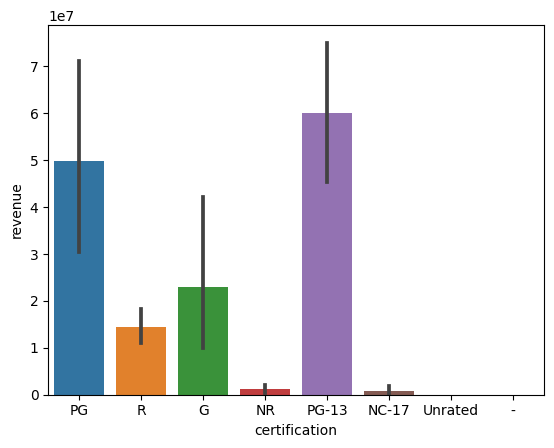

In [10]:
sns.barplot(data=df_combined, x='certification',y='revenue');

In [11]:
df_combined.loc[df_combined['certification']=='Unrated']

,revenue,certification
483,0.0,Unrated


In [12]:
df_combined = df_combined.drop(index=483)

In [13]:
df_combined.loc[df_combined['certification']=='-']

,revenue,certification
2029,0.0,-


In [14]:
df_combined = df_combined.drop(index=2029)

# Hypothesis Test I

does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

## State the null and alternative hypotheses.

Null Hypothesis: All the movies regardless of the movie’s MPAA rating generate the same revenue.

Alternate Hypothesis: There is significant difference between the revenue of the movie with different MPAA ratings can generate.

significance level of alpha = 0.05


## Choose the appropriate hypothesis test

Based on question we need to answer:

we are measuring the revenue which is a numeric quantity.

we are comparing more than two groups: MPAA rating of a movie (G/PG/PG-13/R)

Therefore, the appropriate test to perform would be:

One Way ANOVA


## Check and address the assumptions for the test

For the One Way ANOVA test , we need to test the following assumptions:

No significant outliers

Normality

Equal Variance


## Separating Our Groups

In [15]:
groups = {}
## Loop through all unique categories
for i in df_combined['certification'].unique():
    ## Get series for group and rename
    data = df_combined.loc[df_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [16]:
df_combined['certification'].value_counts()

R        992
NR       540
PG-13    480
PG       208
G         81
NC-17     26
Name: certification, dtype: int64

In [29]:
#Save each group in form of pandas series
R = groups['R']
NR = groups['NR']
PG13 = groups['PG-13']
PG = groups['PG']
G = groups['G']
NC17 = groups['NC-17']

## Checking assumptions

### Checking for normality
since all groups have n>15, we can safely ignore the assumption of normality

### Checking for outliers

In [32]:
# checking outliers for each group
R_outliers = np.abs(stats.zscore(R))>3
NR_outliers = np.abs(stats.zscore(NR))>3
PG13_outliers = np.abs(stats.zscore(PG13))>3
PG_outliers = np.abs(stats.zscore(PG))>3
G_outliers = np.abs(stats.zscore(G))>3
NC17_outliers = np.abs(stats.zscore(NC17))>3

print(R_outliers.sum())
print(NR_outliers.sum())
print(PG13_outliers.sum())
print(PG_outliers.sum())
print(G_outliers.sum())
print(NC17_outliers.sum())

19
9
10
6
1
1


In [33]:
# remove the outliers from each group
R = R.loc[~R_outliers]
NR = NR.loc[~NR_outliers]
PG13 = PG13.loc[~PG13_outliers]
PG = PG.loc[~PG_outliers]
G = G.loc[~G_outliers]
NC17 = NC17.loc[~NC17_outliers]

### Checking for equal variance

In [34]:
result = stats.levene(R, NR, PG13, PG, G, NC17)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=40.84536527409016, pvalue=2.35860046622238e-40)
True


According to the documentation for stats.levene, the null hypothesis for the test is that all groups have equal variance. since the pvalue <0.05, we reject that null hypothesis and conclude that our groups do not have equal variance.

since we do not meet the assumption of equal variance, we will select a non-parametric equivalent of our test: stats.kruskal

## Perform the correct test

In [35]:
test_result = stats.kruskal(R, NR, PG13, PG, G, NC17)
print(test_result)
test_result.pvalue < .05

KruskalResult(statistic=251.73111042380793, pvalue=2.337078978933469e-52)


True

### Interpret the p-value of the result

Our test returns a pvalue <.05. we reject the null hypothesis:All the movies regardless of the movie’s MPAA rating generate the same revenue. support the alternative hypothesis:There is significant difference between the revenue of the movie with different MPAA ratings can generate.

Below codes show the actual average revenue of the movie with different certifitcation

In [36]:
print(f" The averge revenue movie with R certification was {R.mean():.2f}")
print(f" The averge revenue movie with NR certification was {NR.mean():.2f}")
print(f" The averge revenue movie with PG13 certification was {PG13.mean():.2f}")
print(f" The averge revenue movie with PG certification was {PG.mean():.2f}")
print(f" The averge revenue movie with G certification was {G.mean():.2f}")
print(f" The averge revenue movie with NC17 certification was {NC17.mean():.2f}")

 The averge revenue movie with R certification was 7974156.66
 The averge revenue movie with NR certification was 173181.48
 The averge revenue movie with PG13 certification was 40562746.39
 The averge revenue movie with PG certification was 30141545.25
 The averge revenue movie with G certification was 16004809.96
 The averge revenue movie with NC17 certification was 199025.40


## Perform Tukey's Pairwise Multiple Comparison test

Tukey's test will compare every group against every other group and return a p-value for every possible combination of groups.


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the certification
values = df_combined['revenue']
labels = df_combined['certification']


In [38]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-22207244.6396,0.9173,-85400992.0492,40986502.77,False
G,NR,-21807898.2981,0.4261,-55213385.8963,11597589.3,False
G,PG,26853792.7979,0.295,-9864810.1465,63572395.7423,False
G,PG-13,37196736.988,0.0205,3520023.1172,70873450.8587,True
G,R,-8499718.8492,0.9758,-40897324.8861,23897887.1877,False
NC-17,NR,399346.3415,1.0,-55891278.0767,56689970.7596,False
NC-17,PG,49061037.4375,0.1568,-9256743.7095,107378818.5845,False
NC-17,PG-13,59403981.6276,0.0324,2951976.7663,115855986.4888,True
NC-17,R,13707525.7904,0.9818,-41990882.3793,69405933.9601,False
NR,PG,48661691.096,0.0,25782869.2752,71540512.9168,True


As we can see from the above summary: there are 6 significant results. we can see that there is significant difference between certification G and pG-13, between certification NC-17 and PG-13, between certification NR and PG, between certification NR and pG-13, between certification pG and R, and between certification pG13 and R. 

### Conclusion

In conclusion, our test show that there is a significant difference results of certification PG-13 compared to other all certifications. Which means that movies with PG-13 certification generate the highest revenue. 

# Hypothesis Test II

Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

## State the null and alternative hypotheses.

Null Hypothesis: All movies earn same revenue regardless of the length of the movie.

Alternate Hypothesis: Movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long(or less)

significance level of alpha = 0.05

## Choose the appropriate hypothesis test

Based on question we need to answer:

we are measuring the revenue which is a numeric quantity.

we are comparing two groups: movies are over 2.5 hours long and movies are 1.5 hours long or less

Therefore, the appropriate test to perform would be:

2-sample T-test: independent t-test.

## Check and address the assumptions for the test

For the 2-samples T-test, we need to test the following assumptions:

No significant outliers

Normality

Equal Variance

## Getting the two groups of data

In [40]:
df_combined1 = pd.read_csv(final_fname)
df_combined1.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1987.0,PG


In [41]:
df_combined1 = df_combined1[['revenue', 'runtime']]
df_combined1 = df_combined1.dropna(subset = 'runtime')
df_combined1.head()

,revenue,runtime
1,0.0,86.0
2,0.0,100.0
3,0.0,152.0
4,12854953.0,99.0
5,0.0,99.0


In [43]:
## filter the movies with runtime >2.5 hours and <1.5 hours
movie1 = df_combined1.loc[df_combined1['runtime']>150]
movie2 = df_combined1.loc[df_combined1['runtime']<90]

In [48]:
movie1.shape

(209, 2)

In [45]:
df_combined1 = pd.concat([movie1, movie2], axis=0)
df_combined1.head()

,revenue,runtime
3,0.0,152.0
44,0.0,170.0
62,15000000.0,157.0
159,465361176.0,155.0
241,215294342.0,165.0


In [46]:
## create column that defines the 2 groups, lenght of movie>150 or not
df_combined1['longer movie']=df_combined1['runtime']>150
df_combined1.head()

,revenue,runtime,longer movie
3,0.0,152.0,True
44,0.0,170.0,True
62,15000000.0,157.0,True
159,465361176.0,155.0,True
241,215294342.0,165.0,True


In [52]:
df_combined1['longer movie'].value_counts()

False    4037
True      209
Name: longer movie, dtype: int64

## Visualize the two groups to see the different

<AxesSubplot:xlabel='longer movie', ylabel='revenue'>

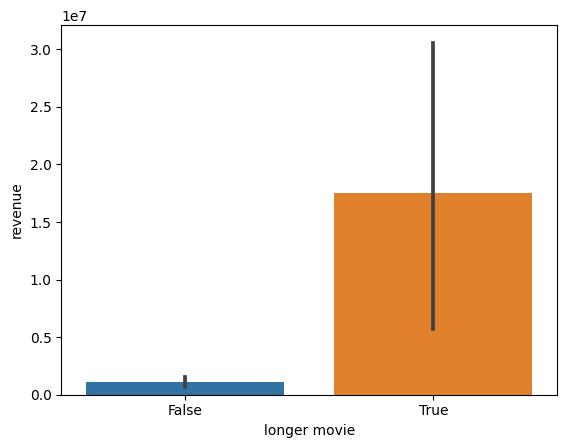

In [49]:
sns.barplot(data=df_combined1, x='longer movie', y='revenue')

In [50]:
## save the two groups as in form of pandas series for better use
movie1_revenue = movie1['revenue']
movie1_revenue.head()

3              0.0
44             0.0
62      15000000.0
159    465361176.0
241    215294342.0
Name: revenue, dtype: float64

In [51]:
movie2_revenue = movie2['revenue']
movie2_revenue.head()

1             0.0
6             0.0
7             0.0
11        14904.0
13    224834564.0
Name: revenue, dtype: float64

## Checking assumptions

### Checking for normality

 We have 4037 movies less than 1.5 hours, 209 movies longer than 2.5 hours. since both groups have n>15, we can safely ignore the assumption of normality

### Checking for outliers

In [53]:
## checking for outliers for movie1
movie1_outliers = np.abs(stats.zscore(movie1_revenue))>3
movie1_outliers.sum()

4

In [54]:
## remove outliers in movie1
movie1_revenue = movie1_revenue.loc[~movie1_outliers]
movie1_revenue

3                0.0
44               0.0
62        15000000.0
241      215294342.0
475              0.0
            ...     
10687     28859072.0
10725            0.0
10755            0.0
10812            0.0
10821            0.0
Name: revenue, Length: 205, dtype: float64

In [55]:
## checking for outliers for movie2
movie2_outliers = np.abs(stats.zscore(movie2_revenue))>3
movie2_outliers.sum()

30

In [56]:
## remove outliers in movie2
movie2_revenue = movie2_revenue.loc[~movie2_outliers]
movie2_revenue

1             0.0
6             0.0
7             0.0
11        14904.0
15            0.0
           ...   
10848         0.0
10852         0.0
10859         0.0
10863    236880.0
10865         0.0
Name: revenue, Length: 4007, dtype: float64

### Checking for equal variance

In [57]:
result = stats.levene(movie1_revenue, movie2_revenue)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=135.63406715472078, pvalue=7.102263429511974e-31)
True


According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. since the pvalue <0.05, we reject that null hypothesis and conclude that our groups do not have equal variance.

since we do not meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance

## Perform the correct test

In [58]:
test_result = stats.ttest_ind(movie1_revenue, movie2_revenue, equal_var=False)
print(test_result)
test_result.pvalue < .05

Ttest_indResult(statistic=2.803517739437582, pvalue=0.00554237476849269)


True

### Interpret the p-value of the result

Our test returns a pvalue <.05. we reject the null hypothesis:All movies earn same revenue regardless of the length of the movie. and support the alternative hypothesis:Movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long(or less).

Below codes show the actual average revenue of our two groups of movies which that the longer movies earn much more revenue than the shorter movies.

In [59]:
print(f" The averge revenue of movies that longer than 2.5 hours was {movie1_revenue.mean():.2f}")
print(f" The averge revenue of movies that shorter than 1.5 hours was {movie2_revenue.mean():.2f}")

 The averge revenue of movies that longer than 2.5 hours was 4383472.11
 The averge revenue of movies that shorter than 1.5 hours was 162900.30


we can see that the movies longer than 2.5 hours earn much more revenue than the movies shorter than 1.5 hours.

# Hypothesis Test III

Do movies released in 2020 earn less revenue than movies released in 2018?

## State the null and alternative hypotheses.

Null Hypothesis: All the movies earn the same revenue regardless the released year of the movie.

Alternate Hypothesis: Movies released in 2020 earn less revenue than movies released in 2018.

significance level of alpha = 0.05

## Choose the appropriate hypothesis test

Based on question we need to answer:

we are measuring the revenue which is a numeric quantity.

we are comparing two groups: movies released in 2020 and movies released in 2018.

Therefore, the appropriate test to perform would be:

2-sample T-test: independent t-test.

## Check and address the assumptions for the test

For the 2-sample T-test: independent t-test , we need to test the following assumptions:

No significant outliers

Normality

Equal Variance

## Getting the  two groups of movie ready

In [68]:
df_combined2 = pd.read_csv(final_fname)

In [62]:
df_combined2 = df_combined2[['revenue', 'release_date']]
df_combined2 = df_combined2.dropna(subset = 'release_date')
df_combined2.head()

,revenue,release_date
1,0.0,2000-09-22
2,0.0,2000-11-15
3,0.0,2000-04-14
4,12854953.0,2000-09-29
5,0.0,2000-09-02


In [66]:
import datetime as dt
df_combined2['release_date'] = pd.to_datetime(df_combined2['release_date'])
movie2018 = df_combined2[df_combined2['release_date'].dt.strftime('%Y') == '2018']
movie2018.head()

,revenue,release_date
2500,0.0,2018-11-02
2501,0.0,2018-11-06
2502,0.0,2018-05-12
2503,0.0,2018-09-21
2505,18850674.0,2018-04-19


In [67]:
movie2020 = df_combined2[df_combined2['release_date'].dt.strftime('%Y') == '2020']
movie2020.head()

,revenue,release_date
2584,0.0,2020-12-24
2616,0.0,2020-05-21
2628,0.0,2020-05-18
2639,0.0,2020-02-11
2845,0.0,2020-02-21


In [69]:
df_combined2 = pd.concat([movie2018, movie2020], axis=0)
df_combined2.head()

,revenue,release_date
2500,0.0,2018-11-02
2501,0.0,2018-11-06
2502,0.0,2018-05-12
2503,0.0,2018-09-21
2505,18850674.0,2018-04-19


In [70]:
## create column that defines the 2 groups, lenght of movie released in 2018 or not
df_combined2['movie']=df_combined2['release_date'].dt.strftime('%Y') == '2018'
df_combined2.head()

,revenue,release_date,movie
2500,0.0,2018-11-02,True
2501,0.0,2018-11-06,True
2502,0.0,2018-05-12,True
2503,0.0,2018-09-21,True
2505,18850674.0,2018-04-19,True


In [71]:
df_combined2['movie'].value_counts()

True     3909
False    3229
Name: movie, dtype: int64

## Visualize the two groups to see the different

<AxesSubplot:xlabel='movie', ylabel='revenue'>

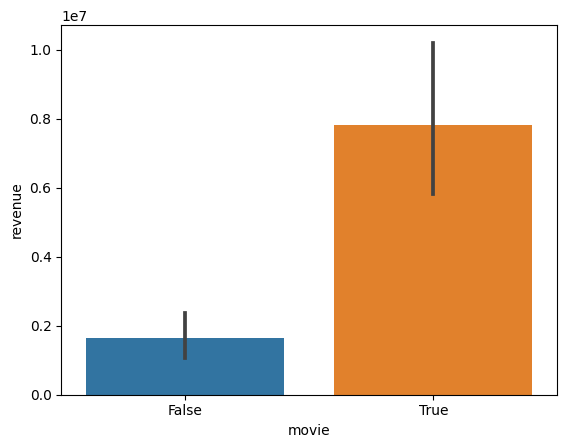

In [72]:
sns.barplot(data=df_combined2, x='movie', y='revenue')

True: movies released in 2018

False: movies released in 2020

In [73]:
## save the two groups as in form of pandas series for better use
movie2018_revenue = movie2018['revenue']
movie2018_revenue.head()

2500           0.0
2501           0.0
2502           0.0
2503           0.0
2505    18850674.0
Name: revenue, dtype: float64

In [74]:
## save the two groups as in form of pandas series for better use
movie2020_revenue = movie2020['revenue']
movie2020_revenue.head()

2584    0.0
2616    0.0
2628    0.0
2639    0.0
2845    0.0
Name: revenue, dtype: float64

## Checking assumptions

### Checking for normality

According to the workflow on the LP, since both groups have n>15, we can safely ignore the assumption of normality

### Checking for outliers

In [75]:
#checking outliers for movies released in 2018
movie2018_revenue_outliers = np.abs(stats.zscore(movie2018_revenue))>3
movie2018_revenue_outliers.sum()

37

In [76]:
# remove the outliers from the movies released in 2018
movie2018_revenue = movie2018_revenue.loc[~movie2018_revenue_outliers]
movie2018_revenue

2500            0.0
2501            0.0
2502            0.0
2503            0.0
2505     18850674.0
            ...    
9795            0.0
9875            0.0
9981            0.0
10109           0.0
10245           0.0
Name: revenue, Length: 3872, dtype: float64

In [77]:
#checking outliers for movies released in 2020
movie2020_revenue_outliers = np.abs(stats.zscore(movie2020_revenue))>3
movie2020_revenue_outliers.sum()

16

In [78]:
# remove the outliers from the movies released in 2020
movie2020_revenue = movie2020_revenue.loc[~movie2020_revenue_outliers]
movie2020_revenue

2584     0.0
2616     0.0
2628     0.0
2639     0.0
2845     0.0
        ... 
10867    0.0
10868    0.0
10869    0.0
10870    0.0
10871    0.0
Name: revenue, Length: 3213, dtype: float64

### Checking for equal variance

In [79]:
result = stats.levene(movie2018_revenue, movie2020_revenue)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=48.839372233788225, pvalue=3.0312232510996744e-12)
True


According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. since the pvalue <0.05, we reject that null hypothesis and conclude that our groups do not have equal variance.

since we do not meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

## Perform the correct test

In [80]:
result = stats.ttest_ind(movie2018_revenue, movie2020_revenue, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=7.582125617384145, pvalue=4.106360992277206e-14)


True

### Interpret the p-value of the result

Our test returns a pvalue <.05. we reject the null hypothesis:There is no significant difference between the sell quantities when the products are discounted and when the products are non=discounted and support the alternative hypothesis:The discounted products sell in higher quantities than the non-discounted products.

Below codes show the actual average revenue of our two groups of movies which that the movies released in 2018 earn more revenue than movies released in 2020

In [81]:
print(f" The averge revenue of movies released in 2018 earned was {movie2018_revenue.mean():.2f}")
print(f" The averge revenue of movies released in 2020 earned was {movie2020_revenue.mean():.2f}")

 The averge revenue of movies released in 2018 earned was 2244086.73
 The averge revenue of movies released in 2020 earned was 489408.11


Above results tell us that the movies released in 2020 earned less revenue than movies released in 2018.